# Appendix 1 - Python code used for analysis

### Proposed analysis of conductance for 3rd year laboratory

In [1]:
#importing all relevant modules 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit, minimize
from scipy.special import factorial

%matplotlib inline

In [34]:
#formula for conductance steps
def steps(r):
    h = 6.63e-34
    e = 1.6e-19
    g = ((2*e**2)/h)*r
    return g

#finding the first 15 steps
number = np.arange(0., 16., 1.)
step = steps(number)

In [3]:
#importing voltage/time data from spectrum files taken by SignalExpress
data, time = np.loadtxt("gold 27.02.csv", delimiter = ',', unpack = True, skiprows = 11) #taken on february 27th
#later on in the code 27th of february spectrum was eliminated, since it is too different
# from the data taken on 2nd of March

#taken on march 2nd - some of the files contain more than 1 second of data in them,
#so I have to filter out for string
data1, time1 = np.loadtxt("1.csv", dtype = str, delimiter = ',', unpack = True, skiprows = 11)
data2, time2 = np.loadtxt("2.csv", dtype = str,delimiter = ',', unpack = True, skiprows = 11)
data3, time3 = np.loadtxt("3.csv", dtype = str,delimiter = ',', unpack = True, skiprows = 11)
data4, time4 = np.loadtxt("4.csv", dtype = str,delimiter = ',', unpack = True, skiprows = 11)

#creating and array of all the times and datas to make the manupation simplier
alltime = np.array ([data, data1, data2, data3, data4])
alldata = np.array ([time, time1, time2, time3, time4])

#current in the circuit recorded along with all the spectrums
current = np.array([27.0e-3, 37.0e-3, 37.0e-3, 37.0e-3, 37.0e-3])*1.0e-6

# a function for removing string from the data and convering the arrays to float
def removeStringFromList(dataList, timeList):
    newdata = []
    newtime = []
    for i in xrange(len(dataList)):
        try:
            float(dataList[i])
            newdata += [dataList[i]]
            newtime += [timeList[i]]
        except:
            continue
    return np.array(newdata, dtype = float), np.array(newtime, dtype = float)

# filtering string out
alltime1 = []
alldata1 = []
for i in range(0,5):
    floattime, floatdata = removeStringFromList(alltime[i], alldata[i])
    alltime1.append(floattime)
    alldata1.append(floatdata)



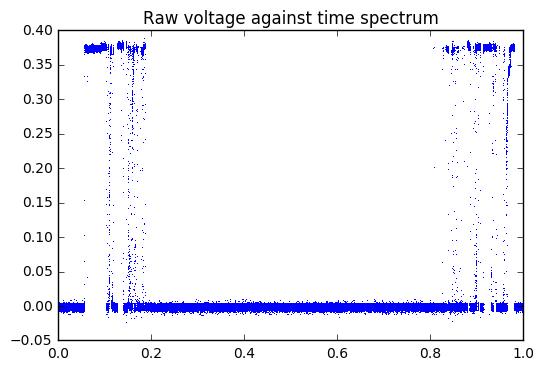

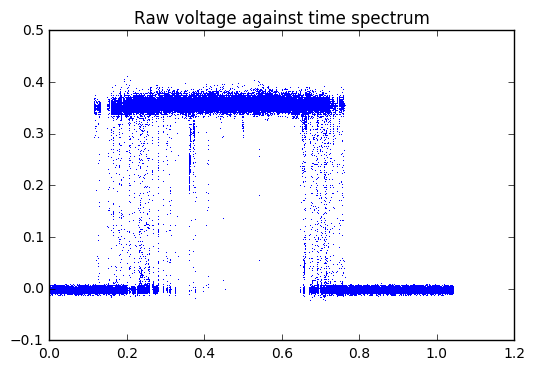

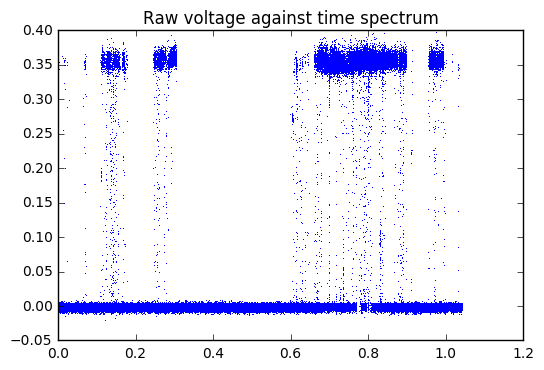

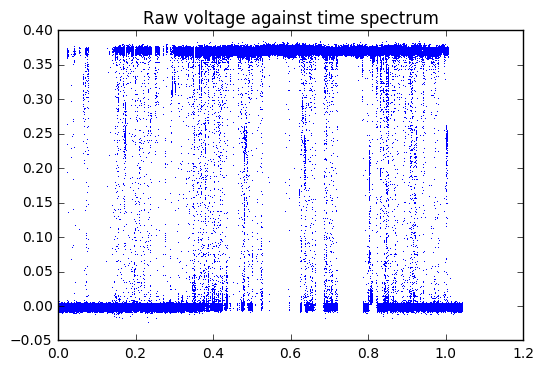

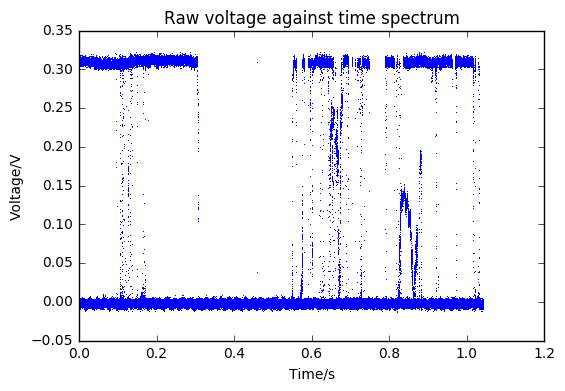

In [103]:
#simplifying the array structure 
newtime = (alltime1[0], alltime1[1], alltime1[2], alltime1[3], alltime1[4] )
newdata = (alldata1[0], alldata1[1], alldata1[2], alldata1[3], alldata1[4] )

#plotting every spectrum to see that I have the correct data
for i in range(0,5):
    plt.figure()
    plt.plot(newtime[i], newdata[i], 'b,')
    plt.title("Raw voltage against time spectrum")
plt.xlabel('Time/s')
plt.ylabel('Voltage/V')

In [104]:
#creating one massive master array of all conductance data points 
#a list of the first conductance spectrum
masterdata = list(newdata[1]) 

#loop to append all the other data 
for i in range(2,5):
    appended = list(newdata[i])
    masterdata += (appended)
    
conductance1 = (abs(np.array(masterdata)))

In [106]:
#correcting all of the voltage data due to gain
#and taking out all ground and input voltage data points
#so that the master array consists of only step related data
inputvoltage = []
resistance = 27.0e3
gain = 1.+ 50.0e3/resistance
a = conductance1/gain

for i in range(0, len(a)):
    if a[i] > 0.01 and a[i] <0.11:
        inputvoltage.append(a[i])
    else:
        continue
        
print "There are", len(inputvoltage), "data points in the array"

There are 41584 data points in the array


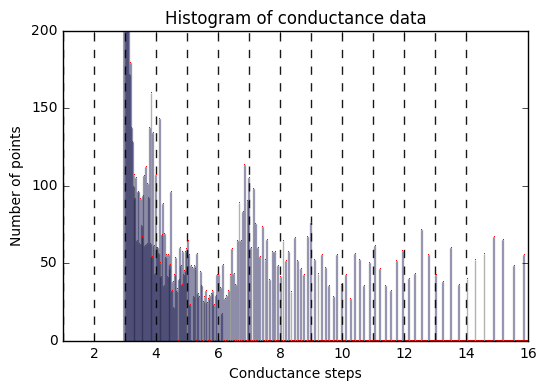

In [107]:
#dashed lines at values for conductance steps - there we expect our peaks
xline = [0.]
for i in range(1, len(step)):
    xline1 = step[i]
    xline.append(xline1) #this will be needed later for statistical analysis
    plt.axvline(x = number[i-1], alpha = 0.9, color = 'k', linestyle = 'dashed')
    
#line bellow only for the legend
plt.axvline(x = xline[0], alpha = 0.9, color = 'k', linestyle = 'dashed', label = "Steps")

#plotting histograms of conductance data
plt.hist((25.0e-6/np.array(inputvoltage))/step[1], bins = 1000, alpha = 0.3)

#creating an array of histogram values
datavalues, binvalues = np.histogram(25.0e-6/np.array(inputvoltage), bins = 1000)

#binvalues reperesent edges of bins and are one element
#longer than the datavlaues array, so we are finding 
#the midpoints of bins
xpoints = []
for i in range(0, (len(binvalues)-1)):
    midpoint = (binvalues[i]+binvalues[i+1])/2.
    xpoints.append(midpoint)

#plotting the arrays with the histogram
plt.plot(xpoints/step[1], datavalues, 'r,', label = "numpy.histogram @ bins = 1000") 
plt.xlim(1, 16)
plt.ylim(0, 200)
plt.ylabel('Number of points')
plt.xlabel('Conductance steps')
plt.title("Histogram of conductance data")
plt.savefig("02.03 25microA steps.jpeg", dpi = 720)


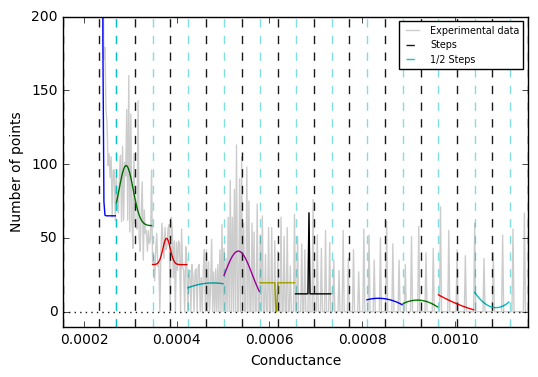

In [93]:
#proposed statistical analysis 

#Gaussian equation
def gaussian(x,x0,sigma,h, y0):
    '''Returns a 1D array of function values for 
    - input array of x-values: x
    - mean value of distribution: x0
    - standard deviation of distribution: sigma
    - peak height, h (measured from background level y0
    - background value: y0'''
    gauss =h*np.exp(-(x-x0)**2/(2*sigma**2)) + y0 # the gaussian itself
    return gauss

#an array of half integer step values
gb = (np.array(xline[:15]) + np.array(xline[1:]))/2.


indx = [0]
mean = []

plt.figure()
# a dashed black line indicating integer step values
for i in range(0, len(xline)):
    plt.axvline(x = xline[i], alpha = 0.9, color = 'k', linestyle = 'dashed')

# a loop to fit gaussians
for i in range(0,12):
    #finding index of the bins that are equal to 1/2 integer value of step
    minnum = list(abs(xpoints - gb[i+3]))
    indx.append(minnum.index(min(minnum)))
    
    #plotting cyenne dashed lines at 1/2 integer values
    plt.axvline(x = xpoints[indx[i+1]], alpha = 0.5, color = 'c', linestyle = 'dashed')
    
    #indicating a region where the gaussian is fitted
    a = datavalues[indx[i]:indx[i+1]]
    b = xpoints[indx[i]:indx[i+1]]
    
    #creating a guess for the gaussian
    guess = [xline[i+3], (xline[i+4] - gb[i+3])/2., max(a), max(a) - min(a[np.nonzero(a)])]
    
    #try/catch sattement to keep the loop going if there is a runtime error on the curve_fit 
    try:
        popt, pcov = curve_fit(gaussian, b, a, p0 = guess )
        
        #writing an array with fitted mean and standard deviation
        mean.append([popt[0], popt[1]])
        
        #finding y-points for the region's fitted gaussian
        fittedcurves = gaussian(b, popt[0], popt[1], popt[2], popt[3] )
        
    except:
        continue
        
    #plotting fitted gaussians for the region
    plt.plot(b, fittedcurves)
    plt.ylim(-10,200)
    plt.xlim(xline[2], max(xline))
    
plt.plot(xpoints, datavalues, 'k-', alpha = 0.2, label = 'Experimental data')
plt.axvline(x = xline[0], alpha = 0.9, color = 'k', linestyle = 'dashed', label = 'Steps')
plt.axvline(x = xpoints[indx[1]], alpha = 0.9, color = 'c', linestyle = 'dashed', label = '1/2 Steps')
plt.axhline(y =0 , alpha = 0.9, color = 'k', linestyle = 'dotted')
plt.ylabel('Number of points')
plt.xlabel('Conductance')
plt.legend(fontsize = 'x-small')
plt.savefig('Gaussians.jpeg', dpi = 720)

In [94]:
#finding Plank's constant from obtained mean and standard deviation
meanstep = np.array([i[0]for i in mean])[0:6]
stepsd = np.array([i[1]for i in mean])[0:6]

#charge of an electron
e= 1.6e-19 #C

# function for plank'd constant
def Plank(G):
    """A function to find Plank's constant from the array of conductance steps
    Input:
    G - an array of experimentally/statistically obtained integer step values
    Output:
    An array of Plank constants"""
    plank = []
    for i in range(0, (len(G)-1)):
        h = 2.*e**2/(G[i+1] - G[i])
        plank.append(h)
    return np.array(plank)

plank = Plank(meanstep)

#a function for finding error in plank's constant 
def PlankError(delG, G):
    deltah = []
    dg = []
    for i in range(0, len(G)-1):
        dG = np.sqrt((delG[i])**2 + (delG[i+1])**2)
        dg.append(dG)
        dh = (2.*e**2) * ( 1./(G[i+1] - G[i])**2)*dG
        deltah.append(dh)
    return np.array(deltah)

herr = PlankError(stepsd, meanstep)

for i in range(len(herr)):
    print "The Plank constant value is", plank[i], "with error", '%fe-34'%(herr[i]/(1e-34))
    

#finding the weigthened mean of the plank's constants and the error on the wightned mean
weight = 1/(herr**2)
sdsq=1/np.sum(weight)
meang=sdsq*(np.sum(plank*weight))

print "\nThe weighted mean of Plank constant is", meang, "with error", '%fe-34'%(np.sqrt(sdsq)/(1e-34))

The Plank constant value is 8.64865306574e-34 with error 2.250010e-34
The Plank constant value is 5.86208352721e-34 with error 1.146645e-34
The Plank constant value is 5.10519807772e-34 with error 90.861244e-34
The Plank constant value is 9.38053433941e-34 with error 306.807548e-34
The Plank constant value is 6.23641816081e-34 with error 2.286788e-34

The weighted mean of Plank constant is 6.40316900355e-34 with error 0.932723e-34


### Example of general data and induvidual conductance steps analysis

213998


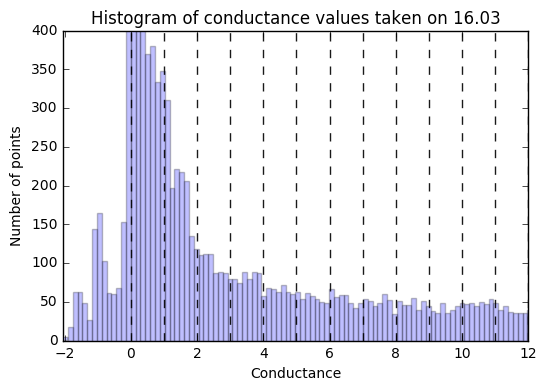

In [97]:
#plotting histogram for the current data taken on 16.03
timec, datac = np.loadtxt("current2.csv", dtype = float, delimiter = ',', unpack = True, skiprows = 12)
print len(datac)

current = datac/max(datac)*97.0e-6 #renormalising to the input current from the battery,
#because the DAQ had some internal resisatnce
voltage = 100.0e-3 #100 mV voltage
conductance = current/voltage

#dashed lines at values for conductance steps - there we expect our peaks
xline = []
for i in range(0, len(step)):
    xline1 = step[i]
    xline.append(xline1)
    plt.axvline(x = number[i], alpha = 0.9, color = 'k', linestyle = 'dashed')

#plotting the histogram for current from 16.03
plt.hist(conductance/step[1], bins = 100, alpha = 0.25)
plt.ylim(0,400)
plt.ylabel('Number of points')
plt.xlabel('Conductance')
plt.title("Histogram of conductance values taken on 16.03")
plt.xlim(min(conductance/step[1]), 12)
plt.savefig("current 16.03.jpeg", dpi = 720)

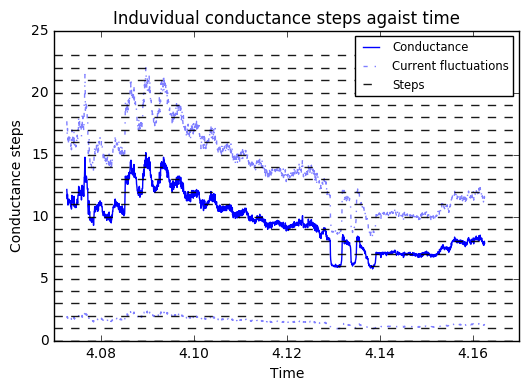

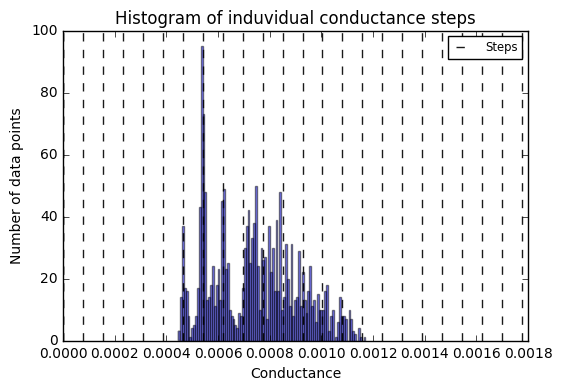

In [33]:
number = np.arange(0., 24., 1.)
step = steps(number)

resistance = 27.0e3
gain = 1.+ 50.0e3/resistance
current = 62.0e-6
c1 = 90.0e-6
c2 = 10.0e-6

times, datas = np.loadtxt("best steps.csv", dtype = float, delimiter = ',', unpack = True, skiprows = 11)

# the conductance steps
plt.plot(times,(gain* current/(datas))/step[1], label = "Conductance")
plt.plot(times,(gain* c2/(datas))/step[1], 'b-.', alpha = 0.5, label = "Current fluctuations")
plt.plot(times,(gain* c1/(datas))/step[1], 'b-.', alpha = 0.5)

xline = []
for i in range(0, len(step)):
    xline1 = step[i]
    xline.append(xline1)
    plt.axhline(y = number[i], alpha = 0.9, color = 'k', linestyle = 'dashed')

plt.axhline(y = xline[0], alpha = 0.9, color = 'k', linestyle = 'dashed', label = "Steps")
plt.ylabel('Conductance steps')
plt.xlabel('Time')
plt.legend(loc = 'best', fontsize = 'small')
plt.title("Induvidual conductance steps agaist time")
plt.savefig("13.03 steps.jpeg", dpi = 720)


# the histogram of all values
plt.figure()
plt.hist((gain* current/(datas)), bins = 100, alpha = 0.5)

for i in range(0, len(step)):
    xline1 = step[i]
    xline.append(xline1)
    plt.axvline(x = xline[i], alpha = 0.9, color = 'k', linestyle = 'dashed')
 
plt.axvline(x = xline[0], alpha = 0.9, color = 'k', linestyle = 'dashed', label = "Steps")
plt.ylabel('Number of data points')
plt.xlabel('Conductance')
plt.legend(loc = 'best', fontsize = 'small')
plt.title("Histogram of induvidual conductance steps")
plt.savefig("13.03 hist.jpeg", dpi = 720)